In [2]:
import torch
import numpy as np

# Logistic Regression

### $ y = \frac{1}{1+e^{-x}}$

In [12]:
x = np.linspace(-6,6,100)
y = 1/(1+np.exp(-x))

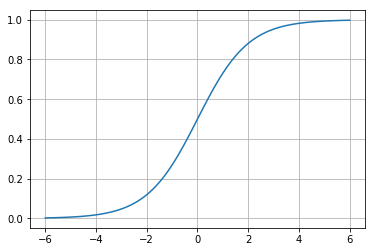

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(x, y)
plt.grid()
plt.

## data

In [27]:
# 下载MNIST训练集
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

train_dataset = datasets.MNIST(root='./data', train=True, \
                              transform=transforms.ToTensor(), \
                              download=True)
test_dataset = datasets.MNIST(root='./data', train=False, \
                             transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, \
                         shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, \
                        shuffle=False)

## model

In [31]:
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, in_dim, n_class):
        super(LogisticRegression, self).__init__()
        self.logistic = nn.Linear(in_dim, n_class)
    
    def forward(self, x):
        out = self.logistic(x)
        return out        

In [33]:
model = LogisticRegression(28*28, 10)
model

LogisticRegression (
  (logistic): Linear (784 -> 10)
)

In [34]:
torch.cuda.is_available()

False

### 定义loss和optimizer 

In [37]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## train

In [49]:
model.eval()

LogisticRegression (
  (logistic): Linear (784 -> 10)
)

In [55]:
import time
# 开始训练
for epoch in range(num_epochs):
    print('*' * 10)
    print('epoch {}'.format(epoch + 1))
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)  # 将图片展开成 28x28
        if torch.cuda.is_available():
            img = Variable(img).cuda()
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)
        # 向前传播
        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        running_acc += num_correct.data[0]
        # 向后传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print('[{}/{}] Loss: {:.6f}, Acc: {:.6f}'.format(
                epoch + 1, num_epochs, running_loss / (batch_size * i),
                running_acc / (batch_size * i)))
    
    print('Finish {} epoch, Loss: {:.6f}, Acc: {:.6f}'.format(
        epoch + 1, running_loss / (len(train_dataset)), running_acc / (len(
            train_dataset))))
    
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = Variable(img, volatile=True).cuda()
            label = Variable(label, volatile=True).cuda()
        else:
            img = Variable(img, volatile=True)
            label = Variable(label, volatile=True)
        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.data[0]
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(
        test_dataset)), eval_acc / (len(test_dataset))))
    print('Time:{:.1f} s'.format(time.time() - since))
    print()

**********
epoch 1
[1/100] Loss: 0.434512, Acc: 0.883646
[1/100] Loss: 0.434366, Acc: 0.887135
[1/100] Loss: 0.432979, Acc: 0.887500
[1/100] Loss: 0.432539, Acc: 0.886719
[1/100] Loss: 0.430482, Acc: 0.887083
[1/100] Loss: 0.430552, Acc: 0.886840
Finish 1 epoch, Loss: 0.432324, Acc: 0.886517
Test Loss: 0.408021, Acc: 0.895300
Time:7.0 s

**********
epoch 2
[2/100] Loss: 0.432882, Acc: 0.885312
[2/100] Loss: 0.431764, Acc: 0.883906
[2/100] Loss: 0.435905, Acc: 0.883125
[2/100] Loss: 0.432827, Acc: 0.884661
[2/100] Loss: 0.428580, Acc: 0.886542
[2/100] Loss: 0.426381, Acc: 0.887934
Finish 2 epoch, Loss: 0.426718, Acc: 0.887533
Test Loss: 0.402901, Acc: 0.896200
Time:7.4 s

**********
epoch 3
[3/100] Loss: 0.430750, Acc: 0.887188
[3/100] Loss: 0.426994, Acc: 0.888333
[3/100] Loss: 0.423445, Acc: 0.888507
[3/100] Loss: 0.424479, Acc: 0.887578
[3/100] Loss: 0.423400, Acc: 0.888208
[3/100] Loss: 0.421896, Acc: 0.888576
Finish 3 epoch, Loss: 0.421591, Acc: 0.888533
Test Loss: 0.398093, Acc: 0

Test Loss: 0.345629, Acc: 0.905900
Time:6.0 s

**********
epoch 25
[25/100] Loss: 0.354907, Acc: 0.900625
[25/100] Loss: 0.361147, Acc: 0.900365
[25/100] Loss: 0.361052, Acc: 0.900903
[25/100] Loss: 0.363055, Acc: 0.900052
[25/100] Loss: 0.362596, Acc: 0.900104
[25/100] Loss: 0.363270, Acc: 0.900174
Finish 25 epoch, Loss: 0.362472, Acc: 0.900700
Test Loss: 0.344154, Acc: 0.906200
Time:6.4 s

**********
epoch 26
[26/100] Loss: 0.364088, Acc: 0.899479
[26/100] Loss: 0.366480, Acc: 0.899844
[26/100] Loss: 0.362293, Acc: 0.900486
[26/100] Loss: 0.360572, Acc: 0.900859
[26/100] Loss: 0.361293, Acc: 0.900875
[26/100] Loss: 0.361350, Acc: 0.900868
Finish 26 epoch, Loss: 0.360986, Acc: 0.900883
Test Loss: 0.342806, Acc: 0.906300
Time:6.2 s

**********
epoch 27
[27/100] Loss: 0.368032, Acc: 0.900521
[27/100] Loss: 0.361821, Acc: 0.902083
[27/100] Loss: 0.358167, Acc: 0.902465
[27/100] Loss: 0.357675, Acc: 0.902448
[27/100] Loss: 0.358734, Acc: 0.901542
[27/100] Loss: 0.360823, Acc: 0.900885
Fin

[48/100] Loss: 0.337749, Acc: 0.907333
[48/100] Loss: 0.337607, Acc: 0.906771
Finish 48 epoch, Loss: 0.337363, Acc: 0.906733
Test Loss: 0.321873, Acc: 0.911500
Time:6.5 s

**********
epoch 49
[49/100] Loss: 0.319657, Acc: 0.914167
[49/100] Loss: 0.327045, Acc: 0.911146
[49/100] Loss: 0.332446, Acc: 0.908854
[49/100] Loss: 0.332575, Acc: 0.908620
[49/100] Loss: 0.333156, Acc: 0.907792
[49/100] Loss: 0.336672, Acc: 0.906944
Finish 49 epoch, Loss: 0.336579, Acc: 0.907000
Test Loss: 0.321280, Acc: 0.911400
Time:6.6 s

**********
epoch 50
[50/100] Loss: 0.333244, Acc: 0.905000
[50/100] Loss: 0.337404, Acc: 0.906927
[50/100] Loss: 0.336448, Acc: 0.906424
[50/100] Loss: 0.332194, Acc: 0.907865
[50/100] Loss: 0.331738, Acc: 0.907792
[50/100] Loss: 0.335818, Acc: 0.906979
Finish 50 epoch, Loss: 0.335831, Acc: 0.907050
Test Loss: 0.320596, Acc: 0.912100
Time:6.5 s

**********
epoch 51
[51/100] Loss: 0.337573, Acc: 0.904687
[51/100] Loss: 0.339726, Acc: 0.905937
[51/100] Loss: 0.335296, Acc: 0.90

[72/100] Loss: 0.322806, Acc: 0.908333
[72/100] Loss: 0.317712, Acc: 0.910521
[72/100] Loss: 0.317926, Acc: 0.910868
[72/100] Loss: 0.320065, Acc: 0.910495
[72/100] Loss: 0.321042, Acc: 0.910438
[72/100] Loss: 0.322283, Acc: 0.910781
Finish 72 epoch, Loss: 0.322404, Acc: 0.910667
Test Loss: 0.309293, Acc: 0.915200
Time:6.6 s

**********
epoch 73
[73/100] Loss: 0.303124, Acc: 0.915937
[73/100] Loss: 0.310970, Acc: 0.912865
[73/100] Loss: 0.314634, Acc: 0.912951
[73/100] Loss: 0.316900, Acc: 0.911823
[73/100] Loss: 0.319182, Acc: 0.910771
[73/100] Loss: 0.322449, Acc: 0.910590
Finish 73 epoch, Loss: 0.321926, Acc: 0.910733
Test Loss: 0.308825, Acc: 0.915600
Time:6.5 s

**********
epoch 74
[74/100] Loss: 0.310226, Acc: 0.911667
[74/100] Loss: 0.312869, Acc: 0.913281
[74/100] Loss: 0.315948, Acc: 0.912674
[74/100] Loss: 0.321216, Acc: 0.911120
[74/100] Loss: 0.320611, Acc: 0.911521
[74/100] Loss: 0.320663, Acc: 0.911198
Finish 74 epoch, Loss: 0.321435, Acc: 0.910850
Test Loss: 0.308342, Ac

[95/100] Loss: 0.312316, Acc: 0.913247
Finish 95 epoch, Loss: 0.312796, Acc: 0.913150
Test Loss: 0.301313, Acc: 0.917200
Time:6.7 s

**********
epoch 96
[96/100] Loss: 0.308951, Acc: 0.913958
[96/100] Loss: 0.311510, Acc: 0.914375
[96/100] Loss: 0.312829, Acc: 0.913472
[96/100] Loss: 0.312264, Acc: 0.913516
[96/100] Loss: 0.312081, Acc: 0.913687
[96/100] Loss: 0.312873, Acc: 0.913351
Finish 96 epoch, Loss: 0.312468, Acc: 0.913283
Test Loss: 0.301021, Acc: 0.917400
Time:6.8 s

**********
epoch 97
[97/100] Loss: 0.327282, Acc: 0.908646
[97/100] Loss: 0.319713, Acc: 0.910208
[97/100] Loss: 0.314261, Acc: 0.911458
[97/100] Loss: 0.313370, Acc: 0.912656
[97/100] Loss: 0.315176, Acc: 0.912625
[97/100] Loss: 0.312379, Acc: 0.913264
Finish 97 epoch, Loss: 0.312121, Acc: 0.913383
Test Loss: 0.300767, Acc: 0.917400
Time:6.5 s

**********
epoch 98
[98/100] Loss: 0.314655, Acc: 0.912500
[98/100] Loss: 0.315580, Acc: 0.912031
[98/100] Loss: 0.312513, Acc: 0.912847
[98/100] Loss: 0.311076, Acc: 0.91

## Save model

In [56]:
# 保存模型
torch.save(model.state_dict(), './logstic.pth')